# K-Means Clustering

## Importing the libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df=pd.DataFrame(iris.data,columns=(iris.feature_names))
df['target']=iris.target
df['target name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [7]:
X=df.iloc[:,[2,3]].values


# Feature Scalling

In [11]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sc=MinMaxScaler()
#sc=StandardScaler()
X=sc.fit_transform(X)

## Using the Dendrogram method to find the optimal number of clusters

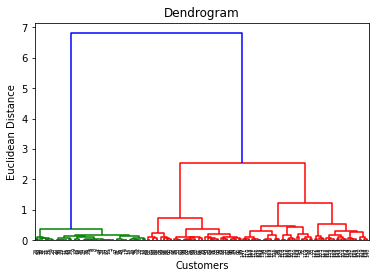

In [12]:
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(Z=sch.linkage(X,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

## Training the Agglomerative HC model on the dataset

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(X)

In [14]:
df['cluster']=y_hc
df.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target name,cluster
140,6.7,3.1,5.6,2.4,2,virginica,0
141,6.9,3.1,5.1,2.3,2,virginica,0
142,5.8,2.7,5.1,1.9,2,virginica,0
143,6.8,3.2,5.9,2.3,2,virginica,0
144,6.7,3.3,5.7,2.5,2,virginica,0
145,6.7,3.0,5.2,2.3,2,virginica,0
146,6.3,2.5,5.0,1.9,2,virginica,0
147,6.5,3.0,5.2,2.0,2,virginica,0
148,6.2,3.4,5.4,2.3,2,virginica,0
149,5.9,3.0,5.1,1.8,2,virginica,0


## Visualising the clusters

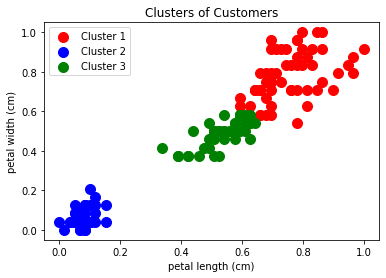

In [17]:
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=100,color='red',marker='o',label='Cluster 1')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=100,color='blue',marker='o',label='Cluster 2')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=100,color='green',marker='o',label='Cluster 3')
plt.title('Clusters of Customers')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()